# Final Assignment: Analytical Design
## Task 1
### a) Retrieve and clean data

In [1]:
# import pandas library
import pandas as pd

# download dataset
dataset = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    names =["sepal_length","sepal_width","petal_length","petal_width", "species"]
    )

'''
# remove attributes we aren't using in this exercise
dataset.drop("species", inplace=True, axis=1)
'''
# remove any rows with missing data
dataset.dropna(inplace=True)

#show first 10 rows using head() method
dataset.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### b)Extract statistics
#### i)Statistics of the whole dataset

In [2]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### ii) Statistics for each species

In [3]:
# extract statistics for setosa
setosa = dataset[dataset["species"] == "Iris-setosa"]
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [4]:
# extract statistics for versicolor
versicolor = dataset[dataset["species"] == "Iris-versicolor"]
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [5]:
# extract statistics for virginica
virginica = dataset[dataset["species"] == "Iris-virginica"]
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### c)Visualisations
#### i)Pairplots

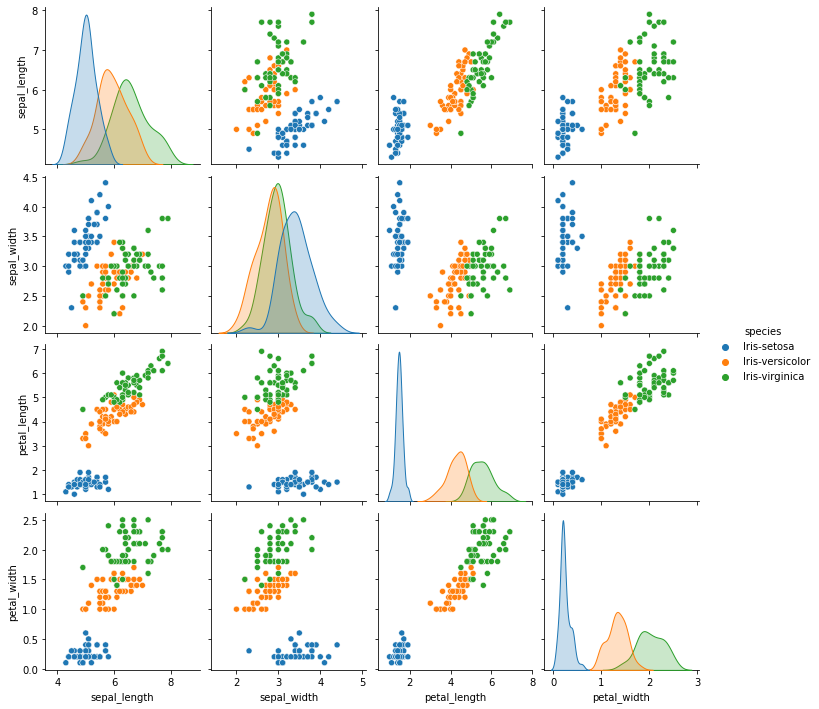

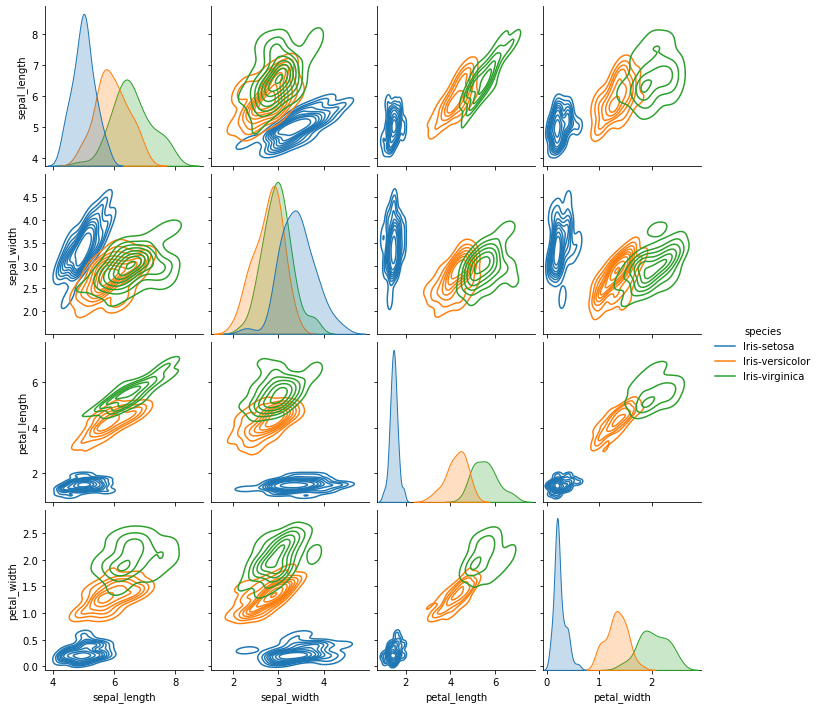

In [6]:
# import seaborn visualisation library
import seaborn as sns
import matplotlib.pyplot as plt

# generate scattergraph pairplot from data
plt.show(
    sns.pairplot(dataset, hue="species", kind="scatter")
)

# generate Kernel Density pairplot from data
plt.show(
    sns.pairplot(dataset, hue="species", kind="kde")
)


These pairplots suggest two things:
* Recorded values for sepal width overlap significantly between all three species. As such, sepal width may be considered a less significant attribute in terms of identification.
* There is a strong, nearly linear relationship between petal length and petal width. This linearity suggests that this dataset might be a good candidate for dimensionality reduction, e.g. either removing one of these attributes, or else by using a process like Principal Component Analysis

#### ii)A scatterplot of petal length x. petal width

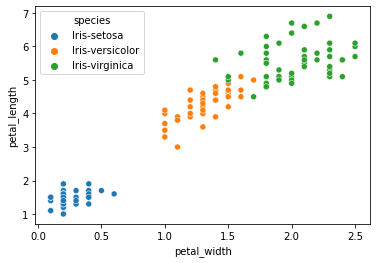

In [7]:
plt.show(
    sns.scatterplot(data=dataset, x="petal_width", y="petal_length", hue="species")
)

#### iii) Linear regression of petal length x petal width

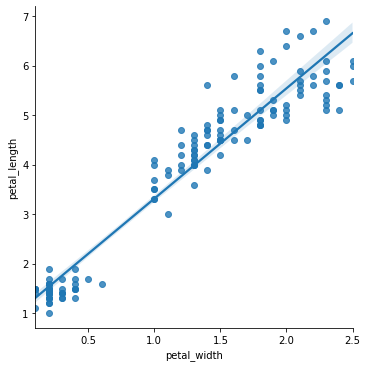

In [8]:
plt.show(
    sns.lmplot(data=dataset, x="petal_width", y="petal_length", )
)

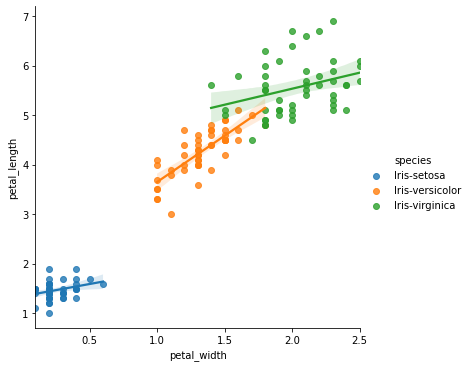

In [9]:
plt.show(
    sns.lmplot(data=dataset, x="petal_width", y="petal_length", hue="species" )
)

### d) clustering
#### i) K-means of petal length vs. sepal length

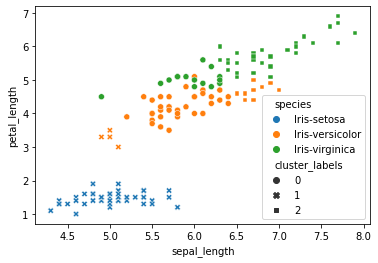

In [10]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# create subset of data
petals_and_sepal_length = dataset.filter(items=["petal_length","sepal_length"])

# standardize values
scaler = StandardScaler()
petals_and_sepal_length = scaler.fit_transform(petals_and_sepal_length)

# initialise kmeans class
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=50,
    max_iter=300,
    random_state=None)

# run clustering algorithm
kmeans.fit(petals_and_sepal_length)
cluster_labels = kmeans.labels_

# add k means labels back to original dataframe
dataset["cluster_labels"] = cluster_labels

# visualise cluster_labels against recorded species
plt.show(
    sns.scatterplot(data=dataset, x="sepal_length", y="petal_length", hue="species", style ="cluster_labels")
)

* this figure shows the limitations of using a k-means algorithm with these two attributes.

* whilst it is easy to see that each species broadly aligns with one of the identified clusters (e.g, iris setosa with cluster_label 0) the model is far from perfect.
* The 27 misidentified samples equate to an error rate of 18%.

#### K-means clustering of petal data

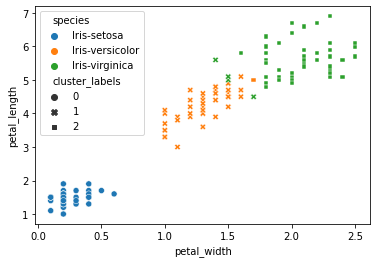

In [11]:
# create subset of data
petals = dataset.filter(items=["petal_length","petal_width"])

# standardize values
petals = scaler.fit_transform(petals)

# run clustering algorithm
kmeans.fit(petals)
cluster_labels = kmeans.labels_

# add k means labels back to original dataframe
dataset["cluster_labels"] = cluster_labels

# visualise cluster_labels against recorded species
plt.show(
    sns.scatterplot(data=dataset, x="petal_width", y="petal_length", hue="species", style ="cluster_labels")
)

* the algorithm is much more succesful on these two attributes. The error rate is only 6 in 150, ie 96% sucess rate. 

### e) Conclusion
This exploratory anaysis of the dataset has suggested that:
* a strong correlation exists between petal size and petal width, though the strength of this correlation is significantly weaker at the species level.
* sepal width is one of the weaker attributes by which to identify these three iris species.
* K-means clustering (using petal length and width as its axes) can create clusters that largely align with species categorisation. 

## Task 2
### a) A flowchart of the steps for creating a dendogram based on single linkage clustering. 

Many tutorials for single-linkage clustering involve a redrawing the distance matrix of all clusters after every clustering operation. However, as single linkage is based on single links (ie, the distance between single plots in differing clusters), no new information is generated by this redrawing. If record of each point's clustering is stored against it then the original distance matrix already contains all the information needed to determine the next cluster. For clarity of code, I have skipped the redundant step of redrawing the distance matrix in each epoch. Names of the functions I will use to accomplish these steps are on the left of the diagram.



### b) Subsetting the data

In [12]:
# filter out irrelevant attributes
sepals = dataset.filter(items=["sepal_length","sepal_width"])

# reducing set to first 6 entries
sepals = sepals.iloc[:6] 

### c) Code for carrying out single linkage clustering.

In [13]:
import math

class Clustering:

    def euclidean_distance(self, ax, ay, bx, by):
        ed = math.sqrt(abs(ax-bx) + abs(ay-by))
        return ed

    def get_coord(self, point):
        
        x = self.points.at[point, "sepal_width"]
        y = self.points.at[point, "sepal_length"]

        return x,y

    def get_distance_matrix(self):
        
        # create empty 2d matrix
        rows, cols = (6, 6)
        dm = [[0 for i in range(cols)] for j in range(rows)]

        # fill in values 
        for i in range(rows):
            point_a = self.get_coord(i)
            for j in range(cols):

                #this if/else is to stop doubling of information between identical i:j and j:i
                if i <= j:
                    dm[i][j] = None
                    continue
                else:
                    point_b = self.get_coord(j)
                    dm[i][j] = self.euclidean_distance(*point_a, *point_b)
        
        # remove blank fields
        for i in dm:
            while None in i:
                i.remove(None)

        return dm
    
    def create_cluster_records(self):
        for i in range(len(self.points)):
            self.points.at[i, "cluster_record"] = i
    
    def __init__(self, dataframe):
        self.points = dataframe
        self.distance_matrix = self.get_distance_matrix()
        self.create_cluster_records()
        
    
    def next_cluster(self):
        
        #abbreviated here for more legible code
        dm = self.distance_matrix
        
        # this tuple, once filled with appropriate values, will be passed back to caller
        next_cluster = {
            "distance" : 99999, # an arbitrarily high number 
            "i" : None,
            "j" : None,
        }
        
        # iterate over distance matrix
        for i in range(len(dm)):
            for j in range(len(dm[i])):
                
                if dm[i][j] > next_cluster["distance"]:
                    continue
                elif self.points.at[i, "cluster_record"] == self.points.at[j, "cluster_record"]:
                    continue
                else:
                    next_cluster = {
                        "distance" : dm[i][j],
                        "i" : i,
                        "j" : j,
                    }
        return next_cluster
    
    def join_clusters(self, next_cluster):
        
        #abbreviation for easier reading
        df = self.points
        i = next_cluster["i"]
        j = next_cluster["j"]
        
        df.loc[df['cluster_record'] == j] = i
                
                





### d) Performing 'Initial Setup'


In [14]:
#initialise Clustering object using our data
c = Clustering(sepals)

#show cluster record just created
print(c.points)

   sepal_length  sepal_width  cluster_record
0           5.1          3.5             0.0
1           4.9          3.0             1.0
2           4.7          3.2             2.0
3           4.6          3.1             3.0
4           5.0          3.6             4.0
5           5.4          3.9             5.0


In [15]:
#show Distance Matrix just generated
for i in c.distance_matrix:
    print(i)

[]
[0.8366600265340751]
[0.8366600265340751, 0.6324555320336761]
[0.9486832980505138, 0.6324555320336765, 0.44721359549995865]
[0.44721359549995765, 0.8366600265340753, 0.8366600265340753, 0.948683298050514]
[0.8366600265340759, 1.1832159566199232, 1.1832159566199232, 1.264911064067352, 0.8366600265340757]


### e) Clustering Epochs
#### i) Cluster one

In [16]:
next_cluster = c.next_cluster()
print(next_cluster)
c.join_clusters(next_cluster)

{'distance': 0.44721359549995765, 'i': 4, 'j': 0}
